In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from matplotlib.backends.backend_pdf import PdfPages


In [11]:
# objectives_file = h5py.File('./objectives/allen485835016_objectives.hdf5', 'r')
# target_volts_path = './target_volts/target_volts_485835016.hdf5'
# target_volts_hdf5 = h5py.File(target_volts_path, 'r')
# #objectives_file = h5py.File('./objectives/multi_stim_bbp_full_allen_gpu_tune_18_stims.hdf5', 'r')
# opt_weight_list = objectives_file['opt_weight_list'][:]
# opt_stim_name_list = objectives_file['opt_stim_name_list'][:]

objectives_file = h5py.File('./objectives/allen485835016_objectives_passive.hdf5', 'r')
target_volts_path = './target_volts/target_volts_485835016_passive.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]

opt_stim_list = [e.decode('ascii') for e in opt_stim_name_list if len(e.decode('ascii')) < 7]

In [8]:
targetFile = [target_volts_hdf5[s][:] for s in opt_stim_list]

history = h5py.File('genResults.hdf5','r')
volt_keys = np.array([elem for elem in history['best_volts'].keys()]).astype(int)
print(volt_keys)
max_key = np.max(volt_keys)
best_volts = history['best_volts'][str(max_key)][:]
best_params = history['best_params'][str(max_key)][:]
print(best_params)
with PdfPages('passive_fit.pdf') as pdf:
    for i in range(best_volts.shape[1]):
        plt.figure()
        plt.plot(best_volts[i])
        plt.plot(targetFile[i])
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()
#         print(np.mean(best_volts[i]), np.mean(targetFile[i]))
#         print()
history.close()

[  0   1  10 100 101 102 103 104 105 106 107 108 109  11 110 111 112 113
 114 115 116 117 118 119  12 120 121 122 123 124 125 126 127 128 129  13
 130 131 132 133 134 135 136 137 138 139  14 140 141 142 143 144 145 146
 147 148 149  15 150 151 152 153 154 155 156 157 158 159  16 160 161 162
 163 164 165 166 167 168  17  18  19   2  20  21  22  23  24  25  26  27
  28  29   3  30  31  32  33  34  35  36  37  38  39   4  40  41  42  43
  44  45  46  47  48  49   5  50  51  52  53  54  55  56  57  58  59   6
  60  61  62  63  64  65  66  67  68  69   7  70  71  72  73  74  75  76
  77  78  79   8  80  81  82  83  84  85  86  87  88  89   9  90  91  92
  93  94  95  96  97  98  99]
[ 4.56266459e-07 -2.09724689e+02  0.00000000e+00  0.00000000e+00
  6.82528450e-02  3.31053666e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.17476566e-04  1.81416369e+00]


IndexError: index 18 is out of bounds for axis 0 with size 18

<Figure size 432x288 with 0 Axes>

In [ ]:
target_volts_path = './target_volts/allen_data_target_volts_10000.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
objectives_file = h5py.File('./objectives/multi_stim_bbp_full_allen_gpu_tune_18_stims.hdf5', 'r')
opt_weight_list = objectives_file['opt_weight_list'][:]
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
opt_stim_list = [e.decode('ascii') for e in opt_stim_name_list]

In [ ]:
neuronFile = np.genfromtxt("targetVolts.csv", delimiter=",")
targetFile = [target_volts_hdf5[s][:] for s in opt_stim_list]
#resultFile = np.genfromtxt("resultVolts.csv", delimiter=",")
neuroGPUFile = np.genfromtxt("targetVoltsGPU.csv", delimiter=",")


i = 0
for targ,nrn,gpu in zip(targetFile,neuronFile,neuroGPUFile):
    plt.figure()
    plt.plot(targ, color="red", label="Target volts")
    #plt.plot(nrn, color='green', label="Neuron")
    plt.plot(gpu, color="blue", label="NeuroGPU")

    plt.title("ind #" + str(i))
    i += 1
    plt.legend()


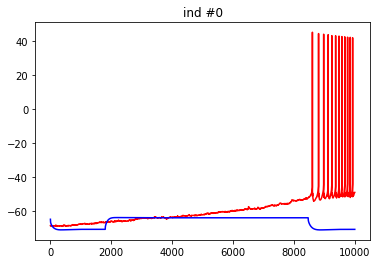

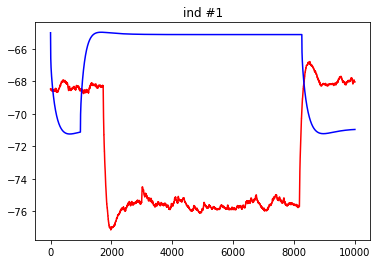

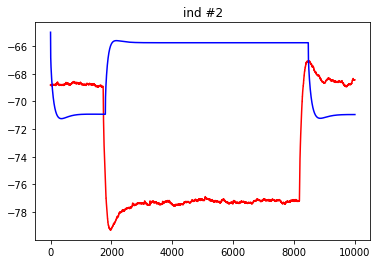

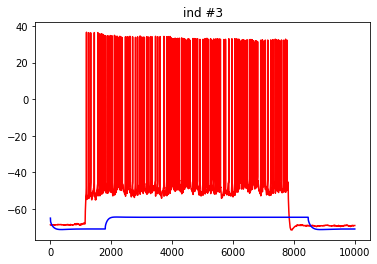

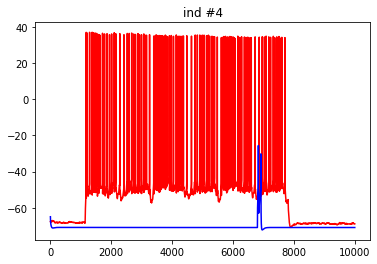

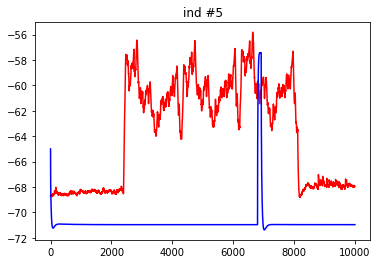

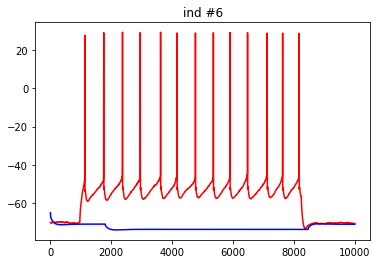

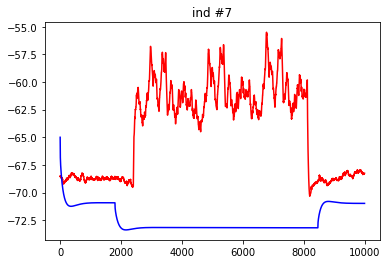

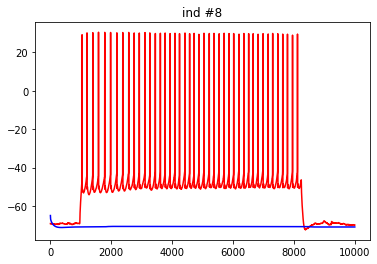

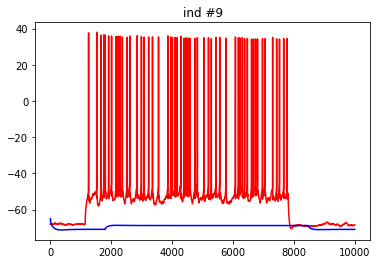

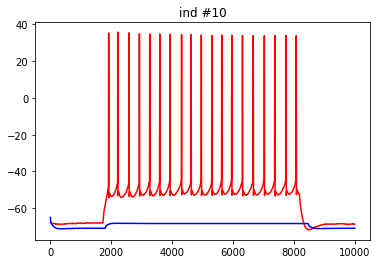

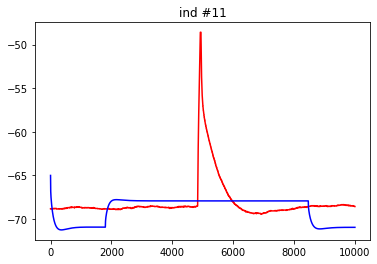

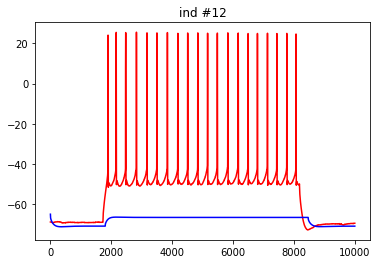

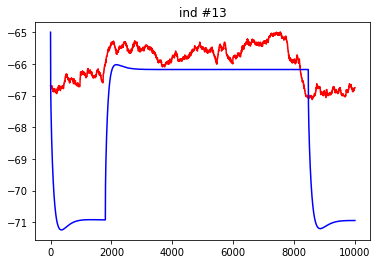

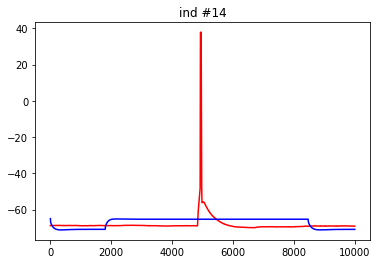

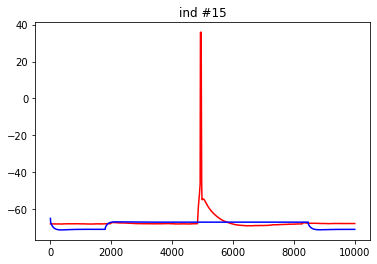

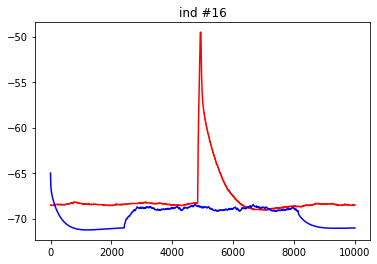

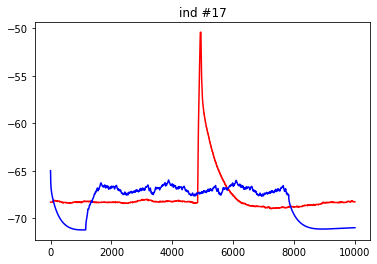

<Figure size 432x288 with 0 Axes>

In [11]:
resFile = h5py.File('best_indv_volts.hdf5','r')
targetFile = [target_volts_hdf5[s][:] for s in opt_stim_list]
#resultFile = np.genfromtxt("resultVolts.csv", delimiter=",")
neuroGPUFile = np.genfromtxt("targetVoltsGPU.csv", delimiter=",")
 
for idx,(targ,gpu) in enumerate(zip(targetFile,neuroGPUFile)):
    resVolts = resFile['volts/volts{}'.format(idx)][:]
    plt.plot(targ, color="red", label="Target volts")
    #plt.plot(gpu, color="blue", label="NeuroGPU")
    plt.plot(resVolts, color='blue', label="Best indv")


    plt.title("ind #" + str(idx))
    plt.figure()
    #axs[i,j].legend()

In [2]:
objectives_file = h5py.File('./objectives/allen485835016_objectives.hdf5', 'r')
target_volts_path = './target_volts/target_volts_485835016.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
#objectives_file = h5py.File('./objectives/multi_stim_bbp_full_allen_gpu_tune_18_stims.hdf5', 'r')
opt_weight_list = objectives_file['opt_weight_list'][:]
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
opt_stim_list = [e.decode('ascii') for e in opt_stim_name_list if len(e.decode('ascii')) < 7]

KeyError: "Unable to open object (object 'volts16' doesn't exist)"

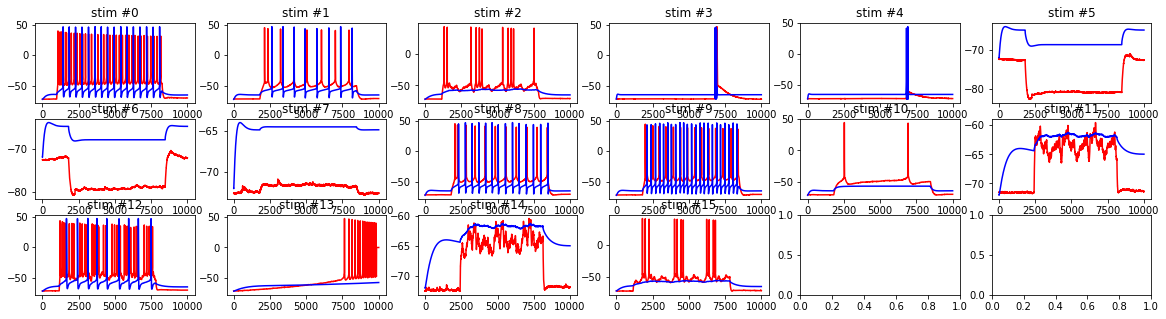

In [15]:
resFile = h5py.File('best_indv_volts.hdf5','r')
targetFile = [target_volts_hdf5[s][:] for s in opt_stim_list]
#resultFile = np.genfromtxt("resultVolts.csv", delimiter=",")
neuroGPUFile = np.genfromtxt("targetVoltsGPUNew2.csv", delimiter=",")
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(20,5))
 
for idx,(targ,gpu) in enumerate(zip(targetFile,neuroGPUFile)):
    resVolts = resFile['volts/volts{}'.format(idx)][:]
    axs.flat[idx].plot(targ, color="red", label="Target volts")
    #axs.flat[idx].plot(gpu, color="green", label="NeuroGPU")
    axs.flat[idx].plot(resVolts, color='blue', label="Best indv")

    axs.flat[idx].set_title("stim #" + str(idx))
    #axs[i,j].legend()

In [5]:
import os
os.chdir("../../neuron_genetic_alg/neuron_files/allen/")
from neuron import h
os.chdir("../../../GPU_genetic_alg/python")

In [27]:
os.getcwd()

'/global/cscratch1/sd/zladd/benchmarking/GPU_genetic_alg/python'

In [19]:
run_file = '"../../neuron_genetic_alg/neuron_files/allen/run_model_cori.hoc'
run_volts_path ='../' # archival: '../../run_volts_bbp_full_gpu_tuned/'
paramsCSV = run_volts_path+'params/params_bbp_full_gpu_tuned_10_based.csv'
orig_params = h5py.File(run_volts_path+'params/params_bbp_full_allen_gpu_tune.hdf5', 'r')['orig_full'][0]
scores_path = '../../scores/'
objectives_file = h5py.File('./objectives/multi_stim_bbp_full_allen_gpu_tune_18_stims.hdf5', 'r')
opt_weight_list = objectives_file['opt_weight_list'][:]
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
score_function_ordered_list = objectives_file['ordered_score_function_list']
stims_path = run_volts_path+'/stims/allen_data_stims_10000.hdf5'
target_volts_path = './target_volts/allen_data_target_volts_10000.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
ap_tune_stim_name = '18'
ap_tune_weight = 0
params_opt_ind = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
data_dir = '../Data/allenData/'
run_dir = '../bin'
vs_fn = '/tmp/Data/VHotP'
stim_file = h5py.File(stims_path, 'r')
target_volts_path = './target_volts/allen_data_target_volts_10000.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')


In [22]:


def run_single_volts(param_set, stim_data, ntimestep = 10000, dt = 0.02):
    run_file = '../../neuron_genetic_alg/neuron_files/allen/run_model_cori.hoc'
    h.load_file(run_file)
    total_params_num = len(param_set)
    timestamps = np.array([dt for i in range(ntimestep)])
    h.curr_stim = h.Vector().from_python(stim_data)
    h.transvec = h.Vector(total_params_num, 1).from_python(param_set)
    h.stimtime = h.Matrix(1, len(timestamps)).from_vector(h.Vector().from_python(timestamps))
    h.ntimestep = ntimestep
    h.runStim()
    out = h.vecOut.to_python()
    return np.array(out),np.cumsum(timestamps)

param_set = [ 2.77053409e-05, -6.66000000e+01,  1.24297735e+01,  1.60850080e-01,
   1.24084929e-01,  1.04799181e+01,  1.94140364e+01,  1.97187449e-01,
   2.37830671e-03,  1.04819139e-01,  2.64212596e-03, 5.94479861e+00,
   6.38950675e-03,  1.45778687e-03]#list(orig_params)

# param_set = [3.56000000e-06, -6.66000000e+01,  5.25000000e+00, 3.85000000e-01,
#    3.85000000e-02,  3.81000000e+00,  8.87000000e+00,  2.09000000e-02,
#    2.71000000e-04,  3.26000000e-02,  4.01000000e-04,  1.48000000e+00,
#    6.98000000e-04, 3.14000000e-04]
param_set = [3.56000000e-06, -6.66000000e+01,  5.25000000e+00,  3.85000000e-01,
   3.85000000e-02,  3.81000000e+00,  8.87000000e+00,  2.09000000e-02,
   2.71000000e-04,  3.26000000e-02,  4.01000000e-04,  1.48000000e+00,
   6.98000000e-04,  3.14000000e-04]

param_set = [ 2.28751360e-05, -6.66000000e+01,  3.21762267e+01,  6.21046872e-01,
   2.94480991e-01,  2.07258376e+01,  6.92605270e+01,  1.11825478e-01,
   2.86343401e-05,  1.07878126e-01 , 1.17420720e-04 , 1.37611529e+01,
   6.14194392e-03 , 2.61671546e-03]

opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
score_function_ordered_list = objectives_file['ordered_score_function_list'][:]
#stims_path = '../../stims/' + inputs['stim_file'] + '.hdf5'
stim_file = h5py.File(stims_path, 'r')
res = []
for i in range(len(opt_stim_name_list))[2:5]:
    res.append(run_single_volts(param_set,stim_file[opt_stim_name_list[i]][:])[0])

finshed run matrix
finshed run matrix
finshed run matrix


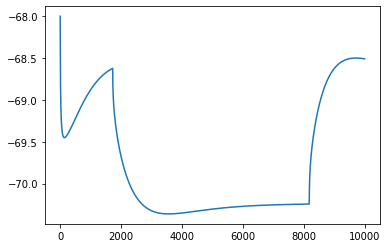

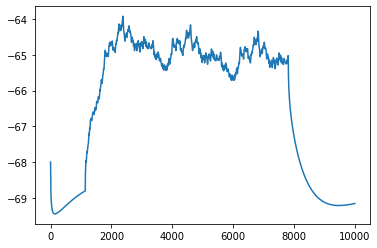

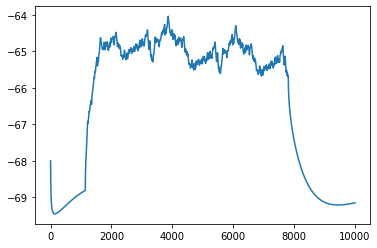

In [23]:
for resi in res:
    plt.figure()
    plt.plot(resi)


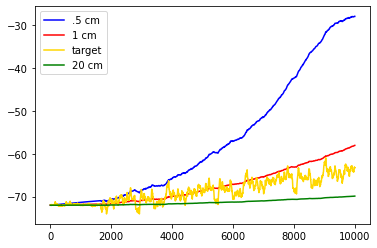

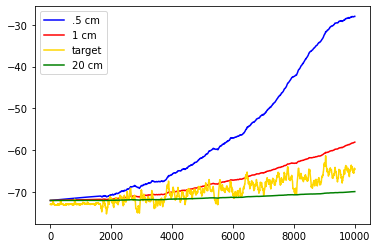

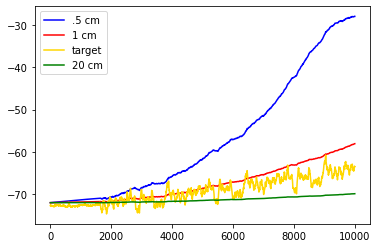

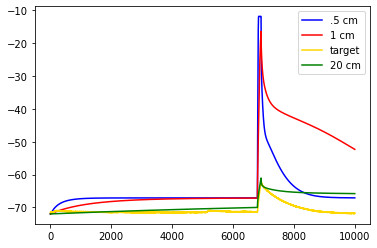

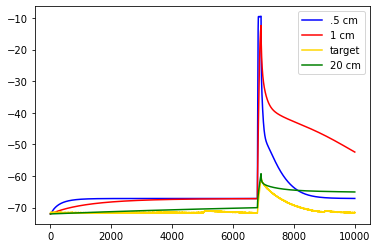

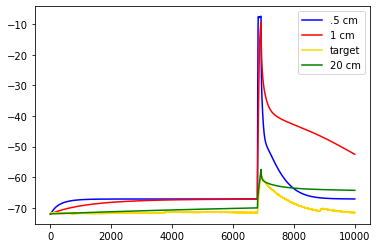

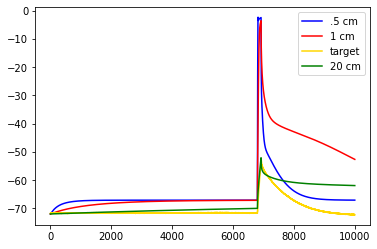

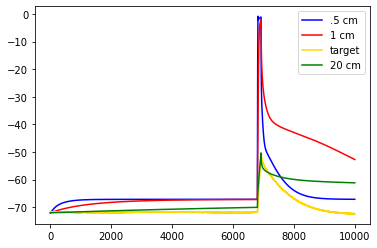

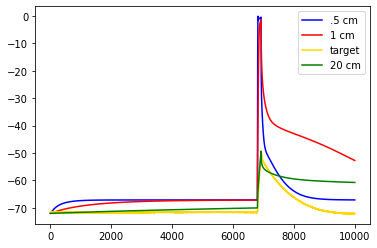

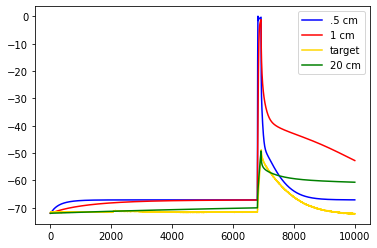

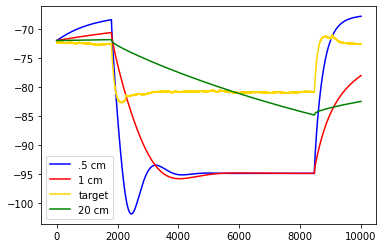

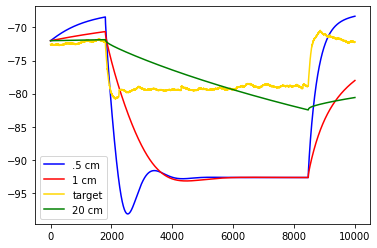

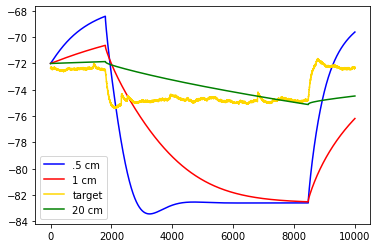

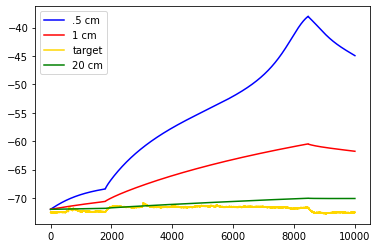

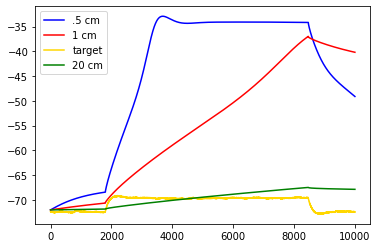

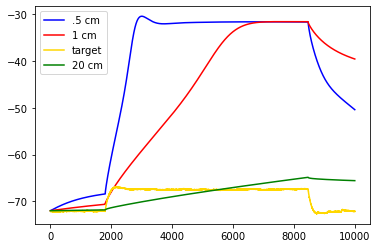

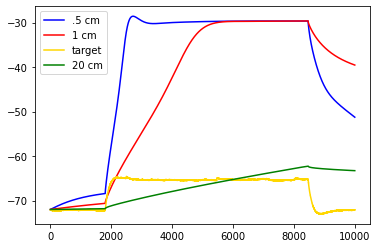

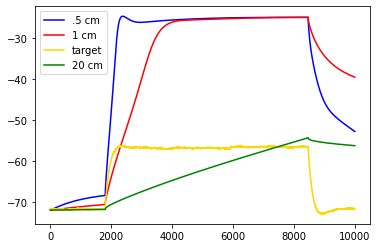

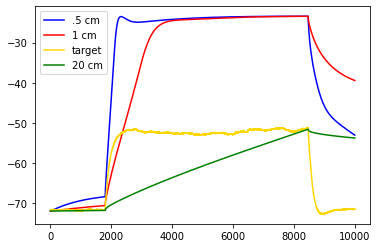

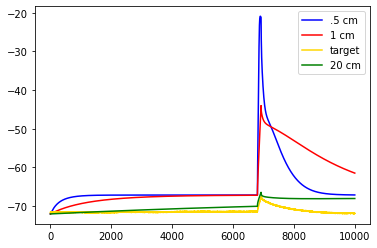

In [13]:
target_volts_path = './target_volts/target_volts_485835016_passive.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
targetFile = [target_volts_hdf5[s][:] for s in opt_stim_list]

cm1 = np.genfromtxt("cm1.csv", delimiter=",")
cm5 = np.genfromtxt("targetVolts_cm.5.csv", delimiter=",")
cm20 = np.genfromtxt("targetVolts_cm20.csv", delimiter=",")



for cmone,cmonefive,cmtwenty,targ in zip(cm1,cm5,cm20,targetFile):
    plt.figure()
    plt.plot(cmonefive, color="blue", label=".5 cm")
    plt.plot(cmone, color="red", label="1 cm")
    plt.plot(targ, color='gold', label='target')
    plt.plot(cmtwenty, color='green', label="20 cm")
    plt.legend()
